# Exercise of Starbuck Customer Data

This Juputer Notebook contains the data analysis of starbuck customer data, their purchase history and the promotion campaign. I will study the distribution of customers, their demography and its relation to their purchase habit. 

The data is taken from Kaggle:

https://www.kaggle.com/ihormuliar/starbucks-customer-data?select=profile.csv

In this notebook I will analyze the performance of the campaign and the customer purchase habit. 

Written by Shing Chi Leung at 13 May 2021


## Fetching Data

I will read all the csv files into corresponding dataframes. 

In [1]:
import pandas as pd
import os

In [2]:
os.listdir("starbuck_kaggle")

['portfolio.csv', 'profile.csv', 'transcript.csv']

In [3]:
df_portfolio = pd.read_csv("starbuck_kaggle/portfolio.csv")
df_transcript = pd.read_csv("starbuck_kaggle/transcript.csv")
df_profile = pd.read_csv("starbuck_kaggle/profile.csv")

## Brief Summary of the Portfolio File

Let us examine briefly some primary characteristics of the datafile. 

In [4]:
df_portfolio.head(10)

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
df_portfolio.shape

(10, 7)

## Brief Summary of the Profile File (i.e. Member List)

Then let us examine the primary characteristic of the profile (member list).

In [6]:
df_profile.rename({"id":"person"}, axis=1, inplace=True)
df_profile.head(5)

,Unnamed: 0,gender,age,person,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [7]:
df_profile.shape

(17000, 6)

In [8]:
df_profile.dtypes

Unnamed: 0            int64
gender               object
age                   int64
person               object
became_member_on      int64
income              float64
dtype: object

I will change the column "became_member_on" to datetime format which will be useful for later use. 

In [9]:
df_profile["became_member_on"] = pd.to_datetime(df_profile["became_member_on"], format="%Y%m%d")

In [10]:
df_profile.head(5)

,Unnamed: 0,gender,age,person,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


I also prepare the cleaned version df_profile_clean which removes all the rows with NaN entries. This will allow for further analysis to connect the purchase habit to the demography of the customers. 

In [11]:
df_profile_clean = df_profile.dropna()

In [12]:
df_profile_clean.head(5)

,Unnamed: 0,gender,age,person,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [13]:
df_profile_clean.shape

(14825, 6)

In [14]:
df_profile_clean.describe()

,Unnamed: 0,age,income
count,14825.000000,14825.000000,14825.000000
mean,8496.961079,54.393524,65404.991568
std,4896.261043,17.383705,21598.299410
min,1.000000,18.000000,30000.000000
25%,4273.000000,42.000000,49000.000000
50%,8490.000000,55.000000,64000.000000
75%,12733.000000,66.000000,80000.000000
max,16999.000000,101.000000,120000.000000


<AxesSubplot:xlabel='age', ylabel='income'>

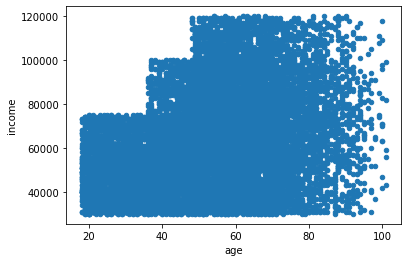

In [16]:
plt1 = df_profile_clean.plot.scatter(x="age", y="income")
plt1

We can see that the minimum income is proportional to the age. Above that there is no signicance clustering between income and ages. 

## Brief Summary of the Transcript File

Then let us examine the primary characteristics of the transcation records. 

In [17]:
df_transcript.head(5)

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [18]:
df_transcript.shape

(306534, 5)

In [19]:
df_transcript.dtypes

Unnamed: 0     int64
person        object
event         object
value         object
time           int64
dtype: object

In the following I check how many unique objects in some major columns.

In [20]:
print("Unique items in the column Value: \n{}\n".format(df_transcript["value"].unique()))
print("Number of unique object: {}".format(df_transcript["value"].nunique()))

Unique items in the column Value: 
["{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}"
 "{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}"
 "{'offer id': '2906b810c7d4411798c6938adc9daaa5'}" ...
 "{'amount': 685.07}" "{'amount': 405.04}" "{'amount': 476.33}"]

Number of unique object: 5121


In [21]:
print("Unique items in the column Event: \n{}\n".format(df_transcript["event"].unique()))
print("Number of unique object: {}".format(df_transcript["event"].nunique()))

Unique items in the column Event: 
['offer received' 'offer viewed' 'transaction' 'offer completed']

Number of unique object: 4


Then I will extract the coupon and transaction amount from the "value" and "time" columns. 

In [31]:
df_transcript["type"] = df_transcript["value"].str.extract(r"\'([A-Za-z ]+)\'")
#df_transcript["code"] = 
df_transcript["code"] = df_transcript["value"].str.extract(r":[ \']+([A-Za-z0-9.]+)\'*")
df_transcript["time"] = df_transcript["time"].apply(lambda x: int(x))

In [33]:
# transfer the payment from digit to payment
def get_payment(row):
    if row["type"] == "amount":
        return float(row["code"])
    else:
        return 0

df_transcript["payment"] = df_transcript.apply(lambda x: get_payment(x), axis=1)

I will also filter the list such that the transaction of identified members are kept, this will be useful for idenitifying the pattern of members to the campaigns. 

In [35]:
member_list = df_profile_clean["person"]
df_transcript_clean = df_transcript[df_transcript["person"].isin(member_list)]

In [36]:
df_transcript_clean

,Unnamed: 0,person,event,value,time,type,code,payment
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5,0.00
5,5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,offer id,f19421c1d4aa40978ebb69ca19b0e20d,0.00
7,7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0,offer id,3f207df678b143eea3cee63160fa8bed,0.00
8,8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00
...,...,...,...,...,...,...,...,...
306527,306527,24f56b5e1849462093931b164eb803b5,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,reward,fafdcd668e3743c1bb461111dcafc2a4,0.00
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,1.5899999999999999,1.59
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,9.53,9.53
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3.61,3.61


Now the transacrion data only contains transactions from identified customers. 

## Analysis of filtered customer behaviour

In this section we will study how much the spending habit in Starbuck of all identified customers. 

In [37]:
df_member_trans = df_transcript_clean.groupby("person").size().sort_values(ascending=False)

Text(0.5, 0, 'Transaction Count')

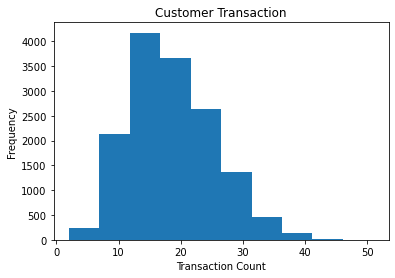

In [44]:
plt2 = df_member_trans.plot.hist()
plt2.set_title("Customer Transaction")
plt2.set_xlabel("Transaction Count")

In [45]:
df_member_trans.head(5)

person
94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
5e60c6aa3b834e44b822ea43a3efea26    48
79d9d4f86aca4bed9290350fb43817c2    48
d0a80415b84c4df4908b8403b19765e3    48
dtype: int64

Let us examine the most frequent user and the user's transaction activity

In [78]:
df_transcript_clean[df_transcript_clean["person"]=="94de646f7b6041228ca7dec82adb97d2"].head(20)

,Unnamed: 0,person,event,value,time,type,code,payment
2276,2276,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,offer id,f19421c1d4aa40978ebb69ca19b0e20d,0.00
16010,16010,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},6,offer id,f19421c1d4aa40978ebb69ca19b0e20d,0.00
24531,24531,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 7.41},30,amount,7.41,7.41
24532,24532,94de646f7b6041228ca7dec82adb97d2,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,30,reward,f19421c1d4aa40978ebb69ca19b0e20d,0.00
42252,42252,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 1.47},102,amount,1.47,1.47
55475,55475,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},168,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
75256,75256,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},186,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
77624,77624,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 2.62},192,amount,2.62,2.62
81725,81725,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 0.59},204,amount,0.59,0.59
93913,93913,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 2.2800000000000002},246,amount,2.2800000000000002,2.28


Now we group the dataframe to find how much each identified customer spent. This will form the dataframe which I will later merge with the customer dataframe. This will help us identify how much each member has spent. 

In [47]:
df_member_sum = df_transcript_clean.groupby("person")["payment"].agg(sum).sort_values(ascending=False)

print(df_member_sum)
print(df_member_sum.size)

person
3c8d541112a74af99e88abbd0692f00e    1608.69
f1d65ae63f174b8f80fa063adcaa63b7    1365.66
ae6f43089b674728a50b8727252d3305    1327.74
626df8678e2a4953b9098246418c9cfa    1321.42
73afdeca19e349b98f09e928644610f8    1319.97
                                     ...   
1c75105c782c4834b6deb20dd8790f3c       0.00
d5c2ad0d116943fab03d7a1055f5c487       0.00
fa4f15334283459680cd4c01af1a3cdb       0.00
fccc9279ba56411f80ffe8ce7e0935cd       0.00
276f46b068304479b621af1a0dcc6f95       0.00
Name: payment, Length: 14825, dtype: float64
14825


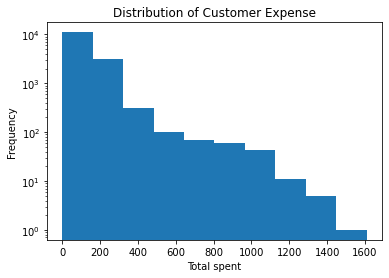

In [48]:
plt3 = df_member_sum.plot.hist()
plt3.set_title("Distribution of Customer Expense")
plt3.set_xlabel("Total spent")
plt3.set_yscale("log")

The relation is a clear exponential relation that the frequency of finding a person spending an amount x is relatedd to exp(-*a*x) for some constant *a*. The maximum is about 1600 dollar (not sure the currency) while the majority spends about 600 -- 1000 dollars. 

We will also check how many offer each customer used. This new dataframe will also be used to merge with the member dataframe for recording their coupon-usage. 

In [49]:
df_offer_used = df_transcript_clean[df_transcript_clean["event"] == "offer completed"].groupby("person")["event"].agg(len)

print(df_offer_used)
print(df_offer_used.size)

person
0009655768c64bdeb2e877511632db8f    3
0011e0d4e6b944f998e987f904e8c1e5    3
0020c2b971eb4e9188eac86d93036a77    3
0020ccbbb6d84e358d3414a3ff76cffd    3
003d66b6608740288d6cc97a6903f4f0    3
                                   ..
fff29fb549084123bd046dbc5ceb4faa    6
fff3ba4757bd42088c044ca26d73817a    3
fff7576017104bcc8677a8d63322b5e1    3
fffad4f4828548d1b5583907f2e9906b    3
ffff82501cea40309d5fdd7edcca4a07    6
Name: event, Length: 11986, dtype: int64
11986


Then we combine the above two new dataframes with the member dataframe.

In [50]:
df_profile_clean = df_profile_clean.merge(df_member_sum, how="outer", left_on="person", right_on="person")
df_profile_clean = df_profile_clean.merge(df_offer_used, how="outer", left_on="person", right_on="person")
df_profile_clean.fillna(0, inplace=True)
df_profile_clean

,Unnamed: 0,gender,age,person,became_member_on,income,payment,event
0,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,77.01,1.0
1,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,159.27,3.0
2,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,57.73,2.0
3,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,36.43,5.0
4,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,15.62,1.0
...,...,...,...,...,...,...,...,...
14820,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,20.03,0.0
14821,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,25.97,1.0
14822,16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,39.74,0.0
14823,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,189.67,3.0


With the combined data we may now analyze the Starbuck customer habits. 

Text(0, 0.5, 'Total expense')

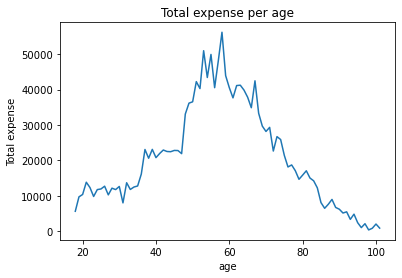

In [73]:
df_profile_clean_gender = df_profile_clean.groupby("age").agg(sum)
plt4 = df_profile_clean_gender["payment"].plot(rot=0)
plt4.set_title("Total expense per age")
plt4.set_ylabel("Total expense")

To my surprise, the customer group which spends the most is about 60. The step like increase in the total expense at age 20 and 40 is likely coming from the steplike income we have shown above. 

Then we examine the relation between income and expenses in Starbuck. 

Text(0, 0.5, 'Total Expense')

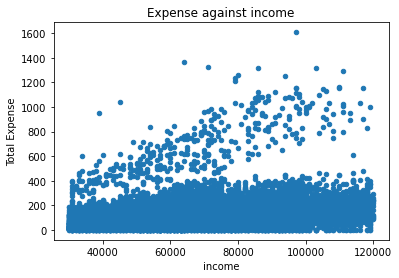

In [64]:
plt5 = df_profile_clean.plot.scatter(x="income", y="payment")
plt5.set_title("Expense against income")
plt5.set_ylabel("Total Expense")

There are two groups of customers here. The first group is income indepenedent. They spend not much and is always about 0 -- 200 regardless of their income. They are the majority of the customer group. The second group is income dependent. The total expense in Starbuck increases with their income. But they contribute to much lower proportional of the whole population.

Then we examine the relation between coupon usage and total expense in Starbuck.

Text(0.5, 0, 'Offer used')

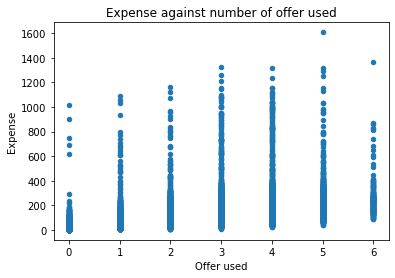

In [66]:
plt6 = df_profile_clean.plot.scatter(x="event", y="payment")
plt6.set_title("Expense against number of offer used")
plt6.set_ylabel("Expense")
plt6.set_xlabel("Offer used")

To my surprise again, the amount of expense does not show significant difference for customers using different number of coupons. In fact, the customer group which uses the most number of coupons spend on average lower than those who use fewer coupones. This suggests that giving coupons appropriately can help to enhance revenue in Starbuck. 

## Examine the Campaign Usage

Now we look at another aspect of the data by examining how good the campaign reaches the customer. We will use the cleaned transcript to extract how many coupons are received, viewed and used in all campaigns. 

In [69]:
df_portfolio["received"] = 0
df_portfolio["viewed"] = 0
df_portfolio["completed"] = 0

for i, id in enumerate(df_portfolio["id"]):
    df_portfolio.loc[i,"received"] = \
        (df_transcript_clean[(df_transcript_clean["code"]==id) & (df_transcript_clean["event"] == "offer received")].size)
    df_portfolio.loc[i,"viewed"] = \
        (df_transcript_clean[(df_transcript_clean["code"]==id) & (df_transcript_clean["event"] == "offer viewed")].size)
    df_portfolio.loc[i,"completed"] = \
        (df_transcript_clean[(df_transcript_clean["code"]==id) & (df_transcript_clean["event"] == "offer completed")].size)


df_portfolio

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id,received,viewed,completed
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,53464,47208,29256
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,52744,50632,26480
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,53256,27896,0
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,53480,27992,33504
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,53808,17720,27088
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,53240,51032,39088
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,53216,51256,40024
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,53144,46984,0
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,52608,50480,32824
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,53048,27680,31288


From the rightmost three columns, we see that most coupons and activities can reach most of the customers. There is no specific trend between the number being used and the difficulty and duration of the campaign. The reward is also less sensitive to how willing the customers want to use the coupon.  

Finally we examine in a daily basis how much revenue Starbuck receives.

Text(0, 0.5, 'Total transaction')

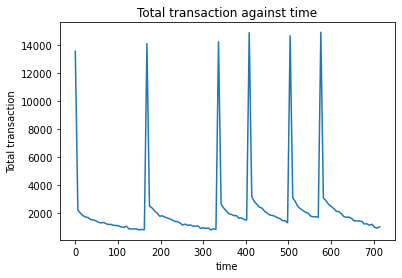

In [76]:
df_transaction_daily = df_transcript_clean.groupby("time")["code"].count()
plt7 = df_transaction_daily.plot()
plt7.set_title("Total transaction against time")
plt7.set_ylabel("Total transaction")

There is six clear spikes in the total transactions (coupon clipping, using and buying). This could represent the campaign which attracted customers to load and use the coupons in the campaign. The transaction gradually decays and until the next campaign starts.

Then we see how much revenue at different days. 

Text(0, 0.5, 'Total cash transaction')

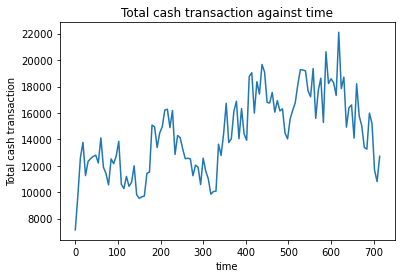

In [77]:
df_payment_daily = df_transcript_clean.groupby("time")["payment"].sum()
plt8 = df_payment_daily.plot()
plt8.set_title("Total cash transaction against time")
plt8.set_ylabel("Total cash transaction")

The total revenue is similar to the transaction in the sense that the campaign can bring to a sharp rise in the revenue in the coming time. And then it gradually drops. This suggests that indeed the campaign can bring to a temporary boost in the total revenue and the customer counts. 